In [188]:
##1. LOADING DATASET
#importing pandas
import pandas as pd

#Reading the clustering data file
clustering_data = pd.read_csv('C:/Users/shyam/Desktop/UCI/Courses/Quarter 1/Python/Project/Clustering Data (1).csv')

#Checking the shape of the imported dataframe
print(f'The dataset has {clustering_data.shape[0]} rows and {clustering_data.shape[1]} columns')
data.head()

The dataset has 15144 rows and 90 columns


,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [158]:
##2. DATA PREPROCESSING
#Preparing the data for clustering by copy the previously created dataset
prep_clustering_data = clustering_data.copy()

# Saving the uid column before dropping it
save_uid_column = prep_clustering_data['uid']

#Dropping the uid and PNRLocaterID fields since they have string values
prep_clustering_data = prep_clustering_data.drop(['PNRLocatorID', 'uid'], axis=1)

#Checking the shape of the prepared dataframe
print(f'The dataset has {prep_clustering_data.shape[0]} rows and {prep_clustering_data.shape[1]} columns')
prep_clustering_data.head(10)

The dataset has 15144 rows and 88 columns


,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,BookingChannel_SCA_Website_Booking,BookingChannel_SY_Vacation,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,0.019524,0,0.000,0,0.029703,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.081774,1,0.000,0,0.039604,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0.026650,0,0.125,1,0.069307,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0.026650,0,0.125,1,0.069307,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0.000000,1,0.000,0,0.035361,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0.000000,1,0.125,1,0.050919,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6,0.000000,1,0.125,1,0.050919,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
7,0.074727,1,0.000,0,0.045262,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8,0.035414,1,0.000,0,0.082037,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9,0.035414,1,0.125,1,0.018388,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20


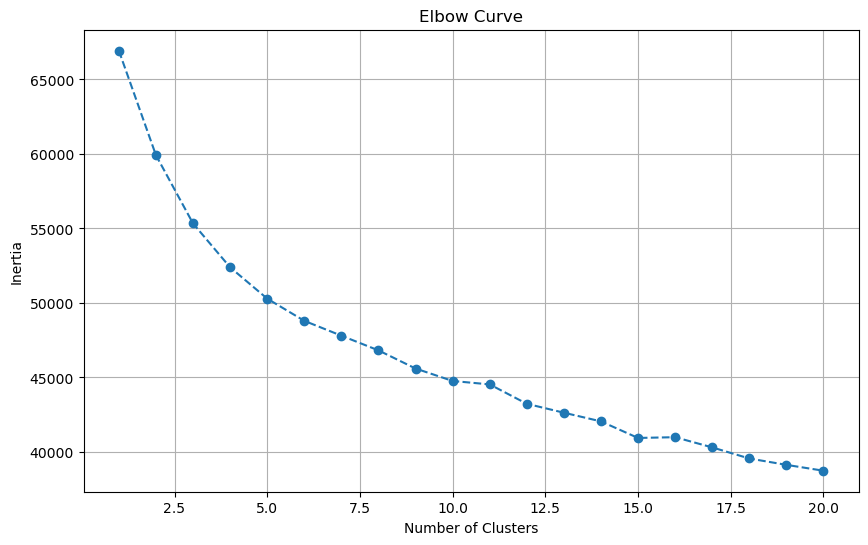

In [89]:
##3. CLUSTERING
#3.1 Looking at the optimum number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []                  # sum of squared distances between each data point and its closest cluster centroid (wcss)
cluster_range = range(1, 21)


for cluster_num in cluster_range:

    print(f'Iteration Number: {cluster_num}')

    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(prep_clustering_data)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [146]:
#3.2 Applying K-Means, and creating 5 centroids as per the Project requirement

kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(prep_clustering_data)

# attach the dropped UID column and cluster
prep_clustering_data = pd.DataFrame({
    'uid': save_uid_column,
    'cluster': kmeans.labels_
})

print(f'The dataset has {prep_clustering_data.shape[0]} rows and {prep_clustering_data.shape[1]} columns')
prep_clustering_data.head()

The dataset has 15144 rows and 2 columns


,uid,cluster
0,504554455244696420493F7C2067657420746869732072...,2
1,46495853454E44696420493F7C20676574207468697320...,2
2,534355545444696420493F7C2067657420746869732072...,4
3,534355545444696420493F7C2067657420746869732072...,4
4,44554D4D414E4E44696420493F7C206765742074686973...,0


In [147]:
##4. MERGED DATASET FOR VISUALIZATION
# Merging the Clustered dataset with the provided sample_data_transformed.csv
sample_transformed = pd.read_csv('C:/Users/shyam/Desktop/UCI/Courses/Quarter 1/Python/Project/sample_data_transformed.csv')
final_dataframe = sample_transformed.merge(prep_clustering_data[['uid', 'cluster']], on='uid', how='left') 

#Checking the shape of the final dataframe and looking at the number of records in each cluster
final_dataframe.head(100)
cluster_sizes = final_dataframe['cluster'].value_counts().sort_index()
print(cluster_sizes)


cluster
0    4101
1    7135
2    4354
3    7481
4    3504
Name: count, dtype: int64


C:\Users\shyam\AppData\Local\Temp\ipykernel_43036\803812223.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_transformed = pd.read_csv('C:/Users/shyam/Desktop/UCI/Courses/Quarter 1/Python/Project/sample_data_transformed.csv')


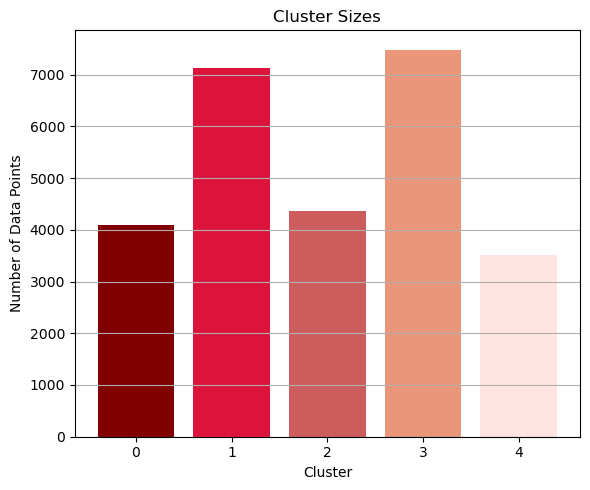

In [212]:
##5. ANALYSIS AND VISUALIZATION
from pandas import *
import matplotlib.pyplot as plt

cluster_colors = {
    0: 'maroon',
    1: 'crimson',
    2: 'indianred',
    3: 'darksalmon',
    4: 'mistyrose'
}

cluster_sizes = final_dataframe['cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 5))


for cluster in range(len(cluster_sizes)):
    plt.bar(cluster, cluster_sizes[cluster], color=cluster_colors[cluster])

# Adding plot details
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.grid(axis='y')
plt.tight_layout()
plt.show()



BookingChannel  Other  Outside Booking  Reservations Booking  \
cluster                                                        
0                  24             3924                   153   
1                   0             7135                     0   
2                  27              985                   234   
3                  50                0                   398   
4                   3                0                    94   

BookingChannel  SCA Website Booking  SY Vacation  Tour Operator Portal  
cluster                                                                 
0                                 0            0                     0  
1                                 0            0                     0  
2                              2906          142                    60  
3                              5465          588                   980  
4                              3407            0                     0  


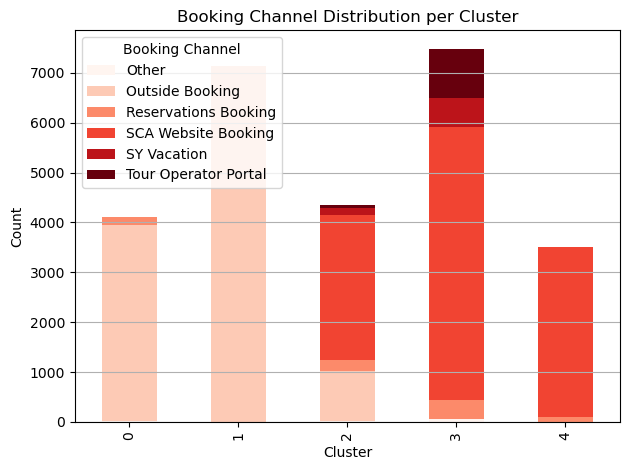

In [211]:
#Preparing the sample dataframe to be plotted
booking_channel_counts = final_dataframe.groupby(['cluster', 'BookingChannel']).size().unstack(fill_value=0)

#Printing the sample dataframe
print(booking_channel_counts)

#Creating the Bar plot
booking_channel_counts.plot(kind='bar', stacked=True, colormap='Reds')

# Adding plot details
plt.title('Booking Channel Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(ticks=range(len(cluster_sizes)))
plt.tight_layout()
plt.grid(axis='y')
plt.legend(title='Booking Channel')

#Displaying the plot
plt.show()

age_group  0-17  18-24  25-34  35-54   55+
cluster                                   
0           790    767   1510   2522  1546
1           353    191    503   1572  1735
2           289    749   1184   1173   706
3           466    356    763    956   963
4          1053    659   1301   2540  1928


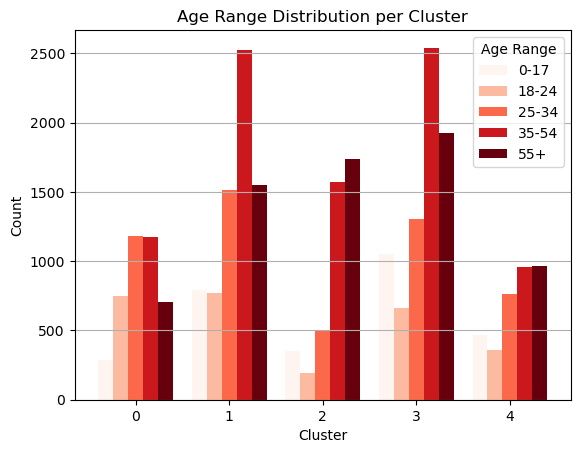

In [210]:
#Preparing the sample dataframe to be plotted
age_group_counts = final_dataframe.groupby(['cluster', 'age_group']).size().unstack()

#Printing the sample dataframe
print(age_range_counts)

#Creating the Bar plot
age_group_counts.plot(kind='bar', width=0.8, colormap='Reds')

# Adding plot details
plt.title('Age Range Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Age Range')

# Displaying the plot
plt.show()

UflyMemberStatus  Elite  Standard  non-ufly
cluster                                    
0                     8       192      3901
1                    18         0      7117
2                    45      4308         1
3                     6         0      7475
4                    21      1048      2435


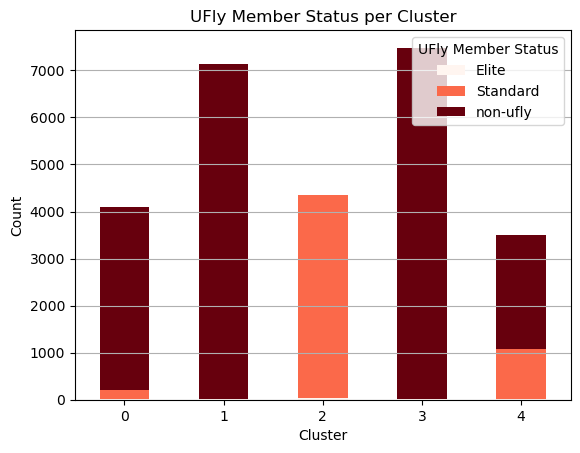

In [208]:
#Preparing the sample dataframe to be plotted
member_status_counts = final_dataframe.groupby(['cluster', 'UflyMemberStatus']).size().unstack(fill_value=0)

#Printing the sample dataframe
print(member_status_counts)

#Creating the Bar plot
member_status_counts.plot(kind='bar', stacked=True, colormap='Reds')

# Adding plot details
plt.title('UFly Member Status per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='UFly Member Status')

# Display the plot
plt.show()

BkdClassOfService  Coach  Discount First Class  First Class
cluster                                                    
0                   4060                     0           41
1                   7096                     0           39
2                   4065                     4          285
3                   7298                     0          183
4                   3321                     1          182


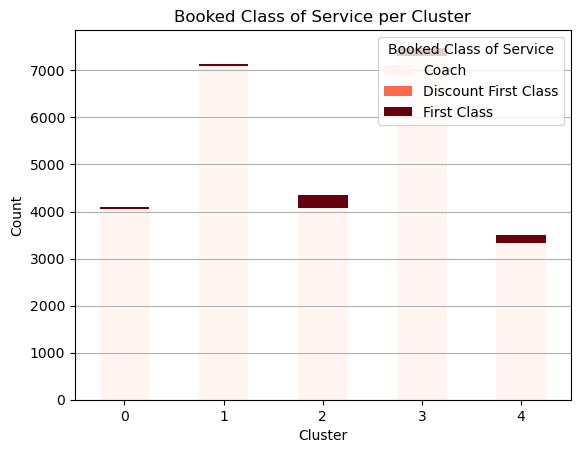

In [209]:
#Preparing the sample dataframe to be plotted
booked_class_counts = final_dataframe.groupby(['cluster', 'BkdClassOfService']).size().unstack(fill_value=0)

#Printing the sample dataframe
print(booked_class_counts)

#Creating the Bar plot
booked_class_counts.plot(kind='bar', stacked=True, colormap='Reds')

# Adding plot details
plt.title('Booked Class of Service per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Booked Class of Service')

# Display the plot
plt.show()

GenderCode     F     M
cluster               
0           2006  2095
1           3709  3426
2           2281  2073
3           3993  3488
4           1821  1683


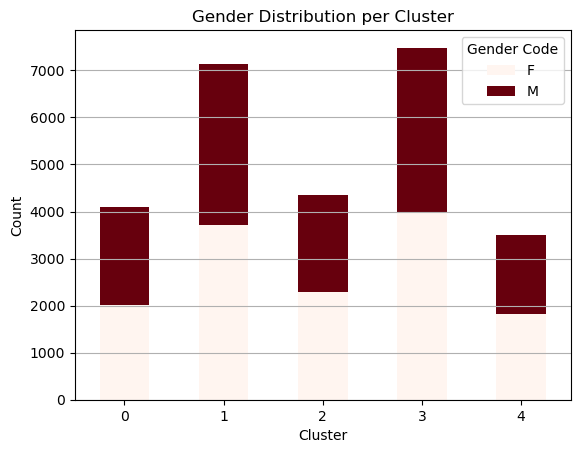

In [207]:
#Preparing the sample dataframe to be plotted
gender_code_counts = final_dataframe.groupby(['cluster', 'GenderCode']).size().unstack(fill_value=0)

#Printing the sample dataframe
print(gender_code_counts)

#Creating the Bar plot
gender_code_counts.plot(kind='bar', stacked=True, colormap='Reds')

# Adding plot details
plt.title('Gender Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Gender Code')

# Displaying the plot
plt.show()

round_trip     0     1
cluster               
0           1940  2161
1            789  6346
2            509  3845
3            865  6616
4           1464  2040


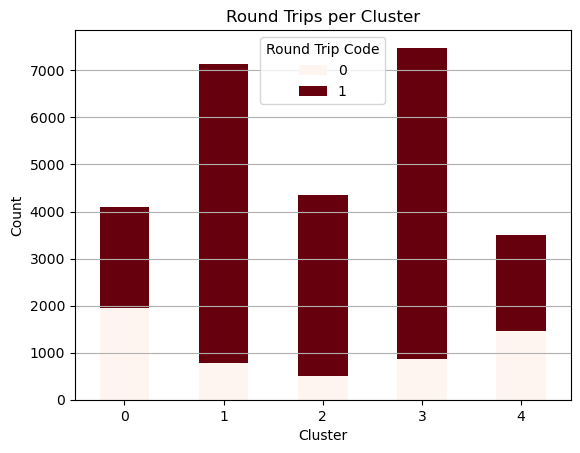

In [206]:
#Preparing the sample dataframe to be plotted
round_trip_counts = final_dataframe.groupby(['cluster', 'round_trip']).size().unstack()

#Printing the sample dataframe
print(round_trip_counts)

#Creating the Bar plot
round_trip_counts.plot(kind='bar', stacked=True, colormap='Reds')

# Adding plot details
plt.title('Round Trips per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Round Trip Code')

# Displaying the plot
plt.show()

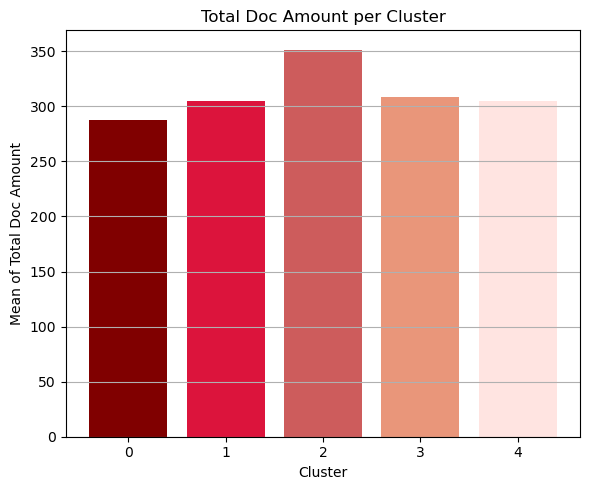

In [202]:
cluster_colors = {
    0: 'maroon',
    1: 'crimson',
    2: 'indianred',
    3: 'darksalmon',
    4: 'mistyrose'
}

#Preparing the sample dataframe to be plotted
cluster_revenue = final_dataframe.groupby('cluster')['TotalDocAmt'].mean()

#Creating the Bar plot
plt.figure(figsize=(6, 5))
for cluster in range(len(cluster_revenue)):
    plt.bar(cluster, cluster_revenue[cluster], width = 0.8, color=cluster_colors[cluster])

# Adding plot details
plt.title('Total Doc Amount per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean of Total Doc Amount')
plt.xticks(ticks=range(len(cluster_revenue)))
plt.grid(axis='y')
plt.tight_layout()

# Displaying the plot
plt.show()

The dataset has 6191 rows and 38 columns


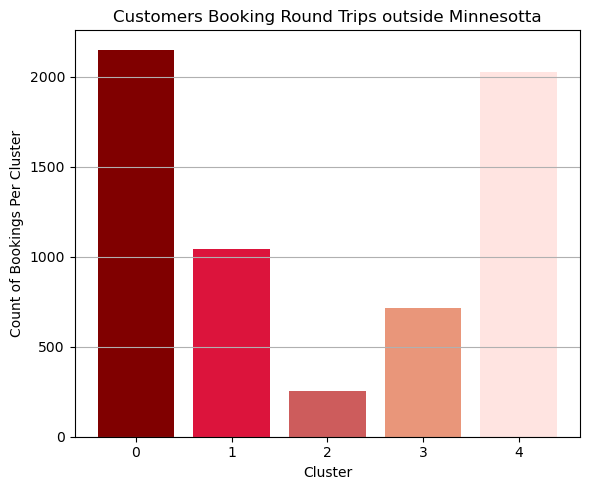

In [203]:
#Preparing the sample dataframe to be plotted
msp_origin_dest = final_dataframe.loc[(final_dataframe['round_trip']== 1) & (final_dataframe['true_origins']!= "MSP")]

print(f'The dataset has {msp_origin_dest.shape[0]} rows and {msp_origin_dest.shape[1]} columns')
cluster_sizes = msp_origin_dest['cluster'].value_counts().sort_index()

#Creating the Bar plot
plt.figure(figsize=(6, 5))
for cluster in range(len(cluster_sizes)):
    plt.bar(cluster, cluster_sizes[cluster], color=cluster_colors[cluster])

# Adding plot details
plt.title('Customers Booking Round Trips outside Minnesotta')
plt.xlabel('Cluster')
plt.ylabel('Count of Bookings Per Cluster')
plt.xticks(ticks=range(len(cluster_revenue)))
plt.grid(axis='y')
plt.tight_layout()

# Displaying the plot
plt.show()

The dataset has 14817 rows and 38 columns


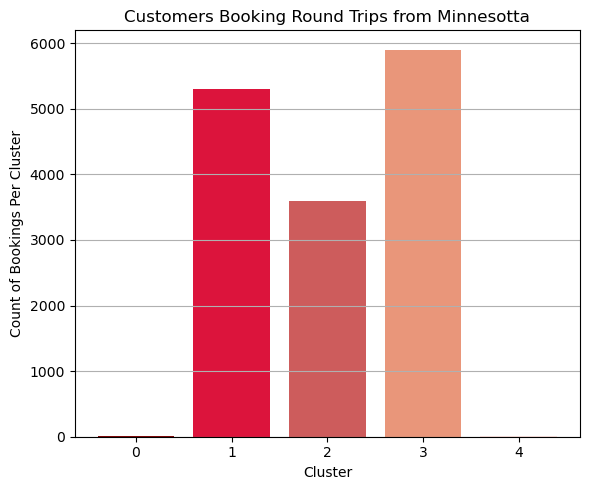

In [204]:
#Preparing the sample dataframe to be plotted
msp_origin_dest = final_dataframe.loc[(final_dataframe['round_trip']== 1) & (final_dataframe['true_origins']== "MSP")]

print(f'The dataset has {msp_origin_dest.shape[0]} rows and {msp_origin_dest.shape[1]} columns')
cluster_sizes = msp_origin_dest['cluster'].value_counts().sort_index()

#Creating the Bar plot
plt.figure(figsize=(6, 5))
for cluster in range(len(cluster_sizes)):
    plt.bar(cluster, cluster_sizes[cluster], color=cluster_colors[cluster])

# Adding plot details
plt.title('Customers Booking Round Trips from Minnesotta')
plt.xlabel('Cluster')
plt.ylabel('Count of Bookings Per Cluster')
plt.xticks(ticks=range(len(cluster_revenue)))
plt.grid(axis='y')
plt.tight_layout()

# Displaying the plot
plt.show()

The dataset has 6191 rows and 38 columns


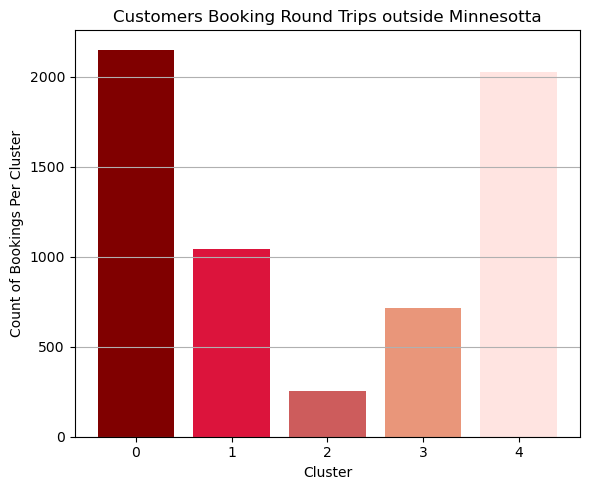

In [205]:
#Preparing the sample dataframe to be plotted
msp_origin_dest = final_dataframe.loc[(final_dataframe['round_trip']== 1) & (final_dataframe['true_origins']!= "MSP")]

print(f'The dataset has {msp_origin_dest.shape[0]} rows and {msp_origin_dest.shape[1]} columns')
cluster_sizes = msp_origin_dest['cluster'].value_counts().sort_index()

#Creating the Bar plot
plt.figure(figsize=(6, 5))
for cluster in range(len(cluster_sizes)):
    plt.bar(cluster, cluster_sizes[cluster], color=cluster_colors[cluster])

# Adding plot details
plt.title('Customers Booking Round Trips outside Minnesotta')
plt.xlabel('Cluster')
plt.ylabel('Count of Bookings Per Cluster')
plt.xticks(ticks=range(len(cluster_revenue)))
plt.grid(axis='y')
plt.tight_layout()

# Displaying the plot
plt.show()

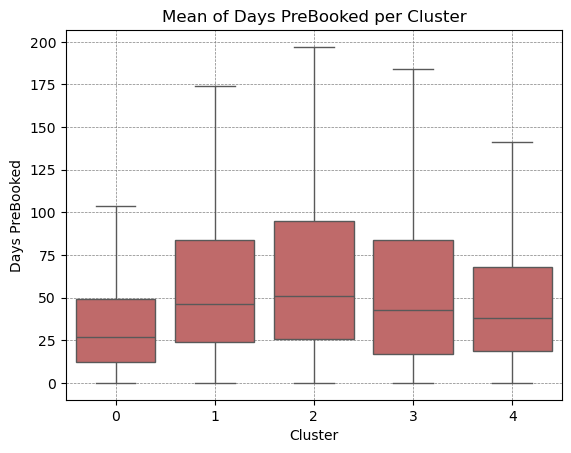

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot without showing outliers
sns.boxplot(x='cluster', y='days_pre_booked', data=final_dataframe, showfliers=False, color='indianred')

# Show grid lines
plt.grid(True)

# Customize grid appearance (optional)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding plot details
plt.title('Mean of Days PreBooked per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Days PreBooked')

# Displaying the plot
plt.show()

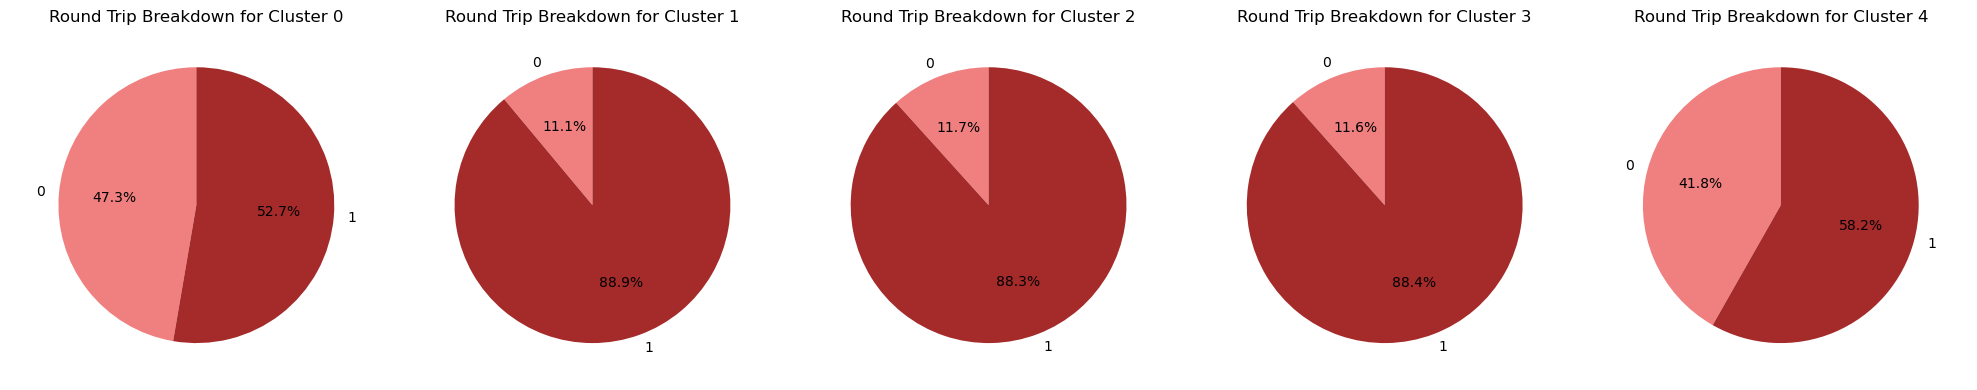

In [215]:
#Preparing the sample dataframe to be plotted
round_trip_counts = final_dataframe.groupby(['cluster', 'round_trip']).size().unstack()

# Create the pie plot by iterating over each cluster
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, cluster in enumerate(round_trip_counts.index):
    values = round_trip_counts.loc[cluster]
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', colors=['lightcoral', 'brown'], startangle=90)
    axes[i].axis('equal')
    axes[i].set_title(f'Round Trip Breakdown for Cluster {cluster}')
plt.tight_layout()

# Displaying the plot
plt.show()
